# Generation

## Track 1 - Videos

In [1]:
from andi_datasets.datasets_challenge import challenge_phenom_dataset, _get_dic_andi2

/home/gorka/miniconda3/envs/andi/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/gorka/miniconda3/envs/andi/lib/python3.10/site-packages/deeptrack/backend/_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
/home/gorka/miniconda3/envs/andi/lib/python3.10/site-packages/deeptrack/backend/_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
2022-12-13 17:55:09.584600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the 

In [2]:
%load_ext autoreload
%autoreload 2

Current is for third

In [4]:
import numpy as np
np.random.seed(0)
import stochastic
stochastic.random.seed(0)

path = 'data_video_big/'
num_fovs = 3

num_experiments = 3
dics = []
for i in range(num_experiments):
    if i > 4:
        i = np.random.randint(0, 5, 1)    
    dic = _get_dic_andi2(i+1) 
    dic['T'] = 200
    dics.append(dic)
    
df_list, videos, lab_t, lab_e = challenge_phenom_dataset(save_data = True,
                                                       dics = dics,
                                                       num_fovs = num_fovs, path = path, return_timestep_labs=True, 
                                                       get_video=True, num_vip=10, prefix='t2_' )

  0%|                                                                             | 0/3 [00:00<?, ?it/s]

Generating video for EXP 0 FOV 0
Generating video for EXP 0 FOV 1
Generating video for EXP 0 FOV 2


 33%|███████████████████████                                              | 1/3 [00:27<00:55, 27.80s/it]

Generating video for EXP 1 FOV 0
Generating video for EXP 1 FOV 1
Generating video for EXP 1 FOV 2


 67%|██████████████████████████████████████████████                       | 2/3 [00:54<00:27, 27.10s/it]

Generating video for EXP 2 FOV 0
Generating video for EXP 2 FOV 1
Generating video for EXP 2 FOV 2


100%|█████████████████████████████████████████████████████████████████████| 3/3 [01:20<00:00, 26.88s/it]


If you want to see the videos as `.mp4`, run the following cell. It will generate mp4s from the tiffs output via the challenge function.

In [10]:
import imageio

for i in range(num_experiments):
    tiff = imageio.mimread(f'data_video/videos_exp_{i}_fov_0.tiff')
    imageio.mimsave(f'data_video/videos_exp_{i}_fov_0.mp4', tiff)


## Track 2 - Trajectories

In [4]:
from andi_datasets.datasets_challenge import challenge_2022_dataset, _get_dic_andi2
import numpy as np
np.random.seed(0)
import stochastic
stochastic.random.seed(0)

num_experiments = 9
dics = []
for i in range(num_experiments):
    if i > 4:
        i = np.random.randint(0, 5, 1)
    
    dic = _get_dic_andi2(i+1)    
    dics.append(dic)
    
df_list, lab_t, lab_e = challenge_2022_dataset(save_data = True,
                                                   dics = dics,
                                                   num_fovs = 1, path ='data/', return_timestep_labs=True)

  0%|          | 0/9 [00:00<?, ?it/s]

In [4]:
df_list[0].head()

,traj_idx,frame,x,y,alpha,D,state
0,0.0,0.0,28.734310,113.241956,0.923955,0.993378,2.0
1,0.0,1.0,29.188723,116.419749,0.923955,0.993378,2.0
2,0.0,2.0,26.769084,112.373860,0.923955,0.993378,2.0
3,0.0,3.0,28.909988,112.186497,0.923955,0.993378,2.0
4,0.0,4.0,28.497453,113.592571,0.923955,0.993378,2.0


This is how the trajectories for the first dataset look like:

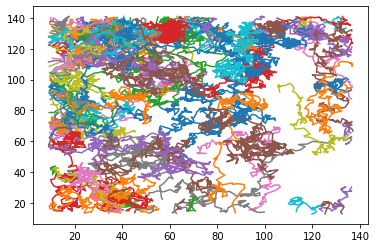

In [30]:
import matplotlib.pyplot as plt
df = df_list[0]
for idx in df.traj_idx.unique():
    x = df.loc[df.traj_idx == idx].x
    y = df.loc[df.traj_idx == idx].y
    plt.plot(x,y)

# 3rd round analysis

In [55]:
from andi_datasets.utils_challenge import load_file_to_df, label_list_to_continuous

In [117]:
exp = 1; fov = 0;

preds = load_file_to_df(f'data/test_third_round_Carlo/preds/t2_videos_exp_{exp}_fov_{fov}_resultsVIP.txt').sort_values(by=['traj_idx'])
trues = load_file_to_df(f'data/test_third_round_Carlo/true/t2_traj_labs_exp_{exp}_fov_{fov}.txt')
# We only care about VIP particles here:
trues_VIP = trues[trues['traj_idx'].isin(preds.traj_idx.values.tolist())] 

# Get ensemble info to visualize
ens = np.loadtxt(f'data/test_third_round_Carlo/true/t2_ens_labs_exp_{exp}_fov_{fov}.txt', skiprows = 1, delimiter = ';')
ens[-1,:] /= np.sum(ens[-1,:]) # Normalize residence times
print('Summary of the current FOV')
df = pd.DataFrame(data = ens.transpose(), columns = [r'mean $\alpha$', r'var $\alpha$', r'mean $D$', r'var $D$', '% residence time'])
df

Summary of the current FOV


,mean $\alpha$,var $\alpha$,mean $D$,var $D$,% residence time
0,0.969462,0.01,1.007416,0.01,0.332143
1,0.511104,0.01,0.059403,0.01,0.667857


### Compute metrics

In [118]:
from andi_datasets.utils_challenge import error_SingleTraj_dataset

In [121]:
error_SingleTraj_dataset(trues_VIP, preds, disable_tqdm=True);

Summary of metrics assesments:

Changepoint Metrics 
RMSE: 4.826 
Jaccard Index: 0.292 

Diffusion property metrics 
Metric anomalous exponent: 0.20155033710994674 
Metric diffusion coefficient: 0.00835950508188757 
Metric diffusive state: 0.5263157894736842


### Visualize predictions

In [116]:
preds

,traj_idx,Ds,alphas,states,changepoints
1,2.0,[0.0113],[0.2294],[1.0],[200.0]
7,3.0,"[0.1223, 0.945]","[0.8104, 1.1645]","[1.0, 2.0]","[162.0, 200.0]"
5,4.0,"[0.5317, 0.1585]","[0.8, 0.17]","[2.0, 0.0]","[180.0, 200.0]"
4,5.0,"[1.4086, 0.8502, 0.2872, 0.7864]","[1.3865, 1.104, 0.3246, 1.1041]","[3.0, 2.0, 0.0, 2.0]","[19.0, 148.0, 176.0, 200.0]"
3,6.0,"[0.8669, 0.0114, 0.9295, 0.0146]","[1.1636, 0.1528, 1.2289, 0.5075]","[2.0, 0.0, 2.0, 1.0]","[25.0, 53.0, 139.0, 200.0]"
6,9.0,[1.0247],[0.7966],[2.0],[200.0]
8,13.0,[0.1792],[0.8229],[1.0],[200.0]
2,14.0,"[1.0197, 0.0158]","[0.953, 0.2194]","[2.0, 1.0]","[27.0, 200.0]"
9,15.0,[0.9368],[0.7298],[2.0],[47.0]
0,16.0,"[0.0327, 0.0291]","[0.4501, 0.7352]","[1.0, 2.0]","[21.0, 200.0]"


In [44]:
trues_VIP 

,traj_idx,Ds,alphas,states,changepoints
2,2.0,[0.002789304834584047],[0.5103098967004346],[2.0],[200.0]
3,3.0,"[0.09356253761211339, 1.0702822767664921, 0.09...","[0.4139679732700586, 1.0319526883435834, 0.413...","[2.0, 2.0, 2.0, 2.0]","[40.0, 52.0, 167.0, 200.0]"
4,4.0,"[0.17074050732630358, 0.8874939225054188, 0.17...","[0.6785058900156246, 1.0222096711766477, 0.678...","[2.0, 2.0, 2.0, 2.0, 2.0]","[34.0, 44.0, 68.0, 123.0, 200.0]"
5,5.0,"[1.1467283279533407, 0.3430793825349315, 1.146...","[1.1688777802027626, 0.5130219746440978, 1.168...","[2.0, 2.0, 2.0, 2.0, 2.0]","[74.0, 105.0, 144.0, 180.0, 200.0]"
6,6.0,"[1.1097671467738068, 0.006454425445896014, 1.1...","[1.0642340501283578, 0.5974889215621588, 1.064...","[2.0, 2.0, 2.0, 2.0]","[19.0, 58.0, 133.0, 200.0]"
9,9.0,"[0.9226257884219996, 0.20235243900820482, 0.92...","[1.037235671284836, 0.3393650461752403, 1.0372...","[2.0, 2.0, 2.0]","[24.0, 68.0, 200.0]"
13,13.0,"[0.054015607467998564, 0.8907906907506116, 0.0...","[0.5699017882542252, 1.1225306559284016, 0.569...","[2.0, 2.0, 2.0]","[136.0, 150.0, 200.0]"
14,14.0,"[0.9674113120479889, 0.008270479073881398, 0.9...","[0.8834898679732649, 0.39436123775247256, 0.88...","[2.0, 2.0, 2.0]","[24.0, 197.0, 200.0]"
15,15.0,"[0.9804222815681526, 0.22990717101944674]","[0.8287702261509639, 0.4186649928651278]","[2.0, 2.0]","[126.0, 200.0]"
16,16.0,[0.031432249845681215],[0.6178333678653216],[2.0],[200.0]


#### Plot Ds

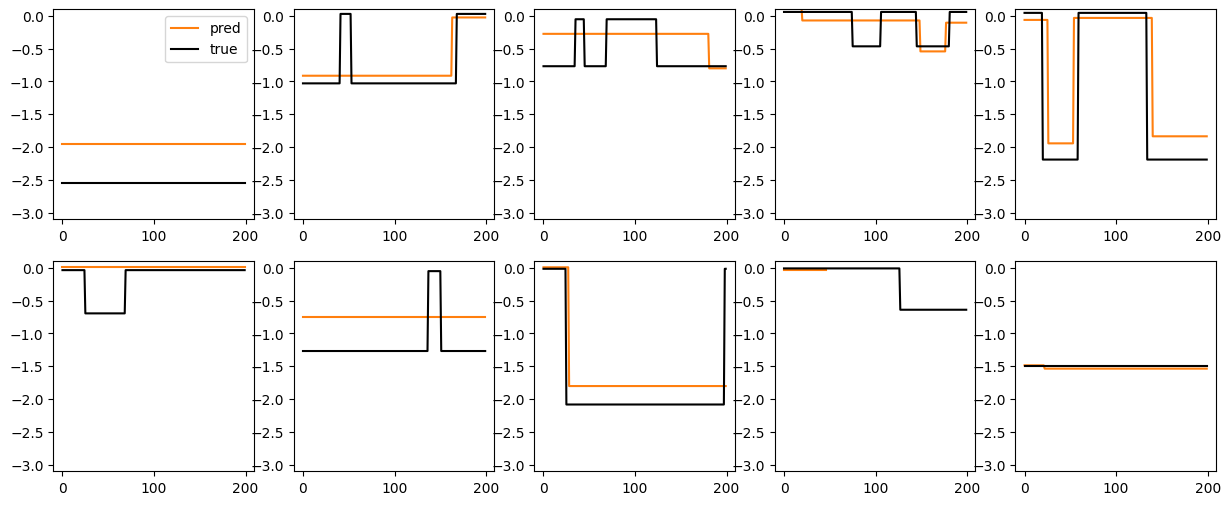

In [97]:
import matplotlib.pyplot as plt
labels = ['pred', 'true']

fig, axs = plt.subplots(2, 5, figsize = (5*3, 2*3))
for ax, idx in zip(axs.flatten(), preds.traj_idx):
    
    for idxd, df in enumerate([preds.copy(), trues_VIP.copy()]):
        df = df[df.traj_idx == idx] 

        cont = label_list_to_continuous(np.array(df.changepoints.values.tolist()[0]).astype(int), df.Ds.values.tolist()[0])    
        ax.plot(np.log10(cont), c = 'k' if idxd == 1 else 'C1', label = labels[idxd])
        
plt.setp(axs, ylim = (-3.1, 0.1));
axs[0,0].legend()

#### Plot $\alpha$s

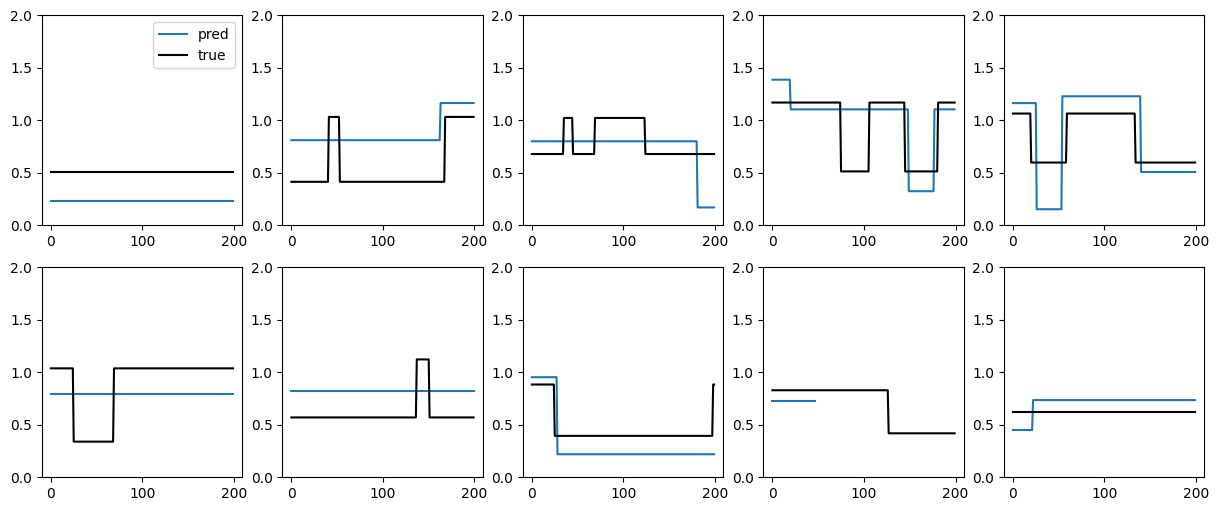

In [99]:
import matplotlib.pyplot as plt
labels = ['pred', 'true']

fig, axs = plt.subplots(2, 5, figsize = (5*3, 2*3))
for ax, idx in zip(axs.flatten(), preds.traj_idx):
    
    for idxd, df in enumerate([preds.copy(), trues_VIP.copy()]):
        df = df[df.traj_idx == idx] 

        cont = label_list_to_continuous(np.array(df.changepoints.values.tolist()[0]).astype(int), df.alphas.values.tolist()[0])    
        ax.plot(cont, c = 'k' if idxd == 1 else 'C0', label = labels[idxd])
        
plt.setp(axs, ylim = (0, 2));
axs[0,0].legend()